In [61]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from census import Census
from us import states

c = Census("417503a9a2de886c849c5923a3f77195b3960d26")

In [62]:
zip_data = pd.read_csv('Zip_Zhvi_AllHomes.csv',encoding = "ISO-8859-1")
state_data = pd.read_csv('State_Zhvi_AllHomes.csv',index_col='RegionName')

In [63]:
sns.set_style("white")
sns.set_palette("husl",39)

Text(0.5, 1.0, 'Percent Growth Rate by County since  2013')

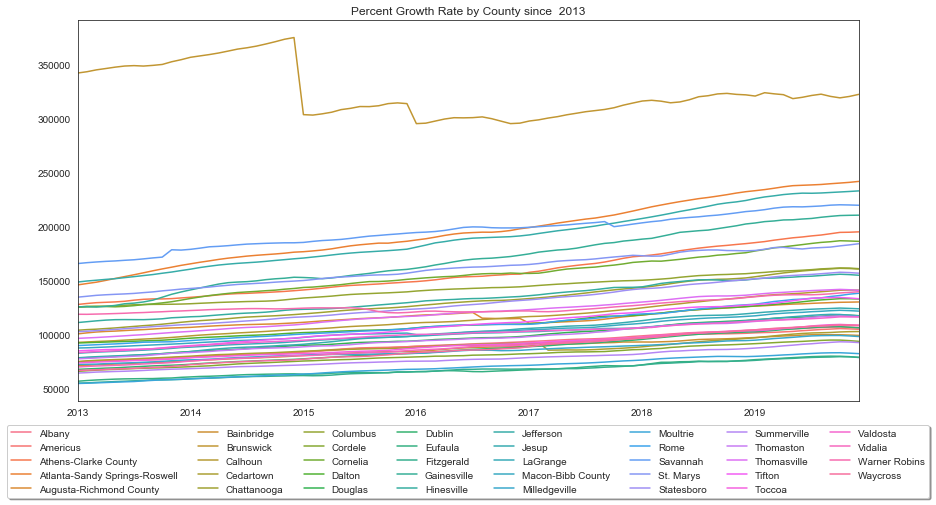

In [64]:
start_year = '2013'

df = zip_data[zip_data['State'] == "GA"]
df = df.groupby(['Metro']).mean()
df = df.drop(['RegionID','RegionName','SizeRank'],axis=1)
df = df.T
df.index = pd.to_datetime(df.index)
df = df.loc[start_year:]
df.plot(figsize=(14,7))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=8, fancybox=True, shadow=True)
plt.title('Percent Growth Rate by County since  ' + str(start_year))

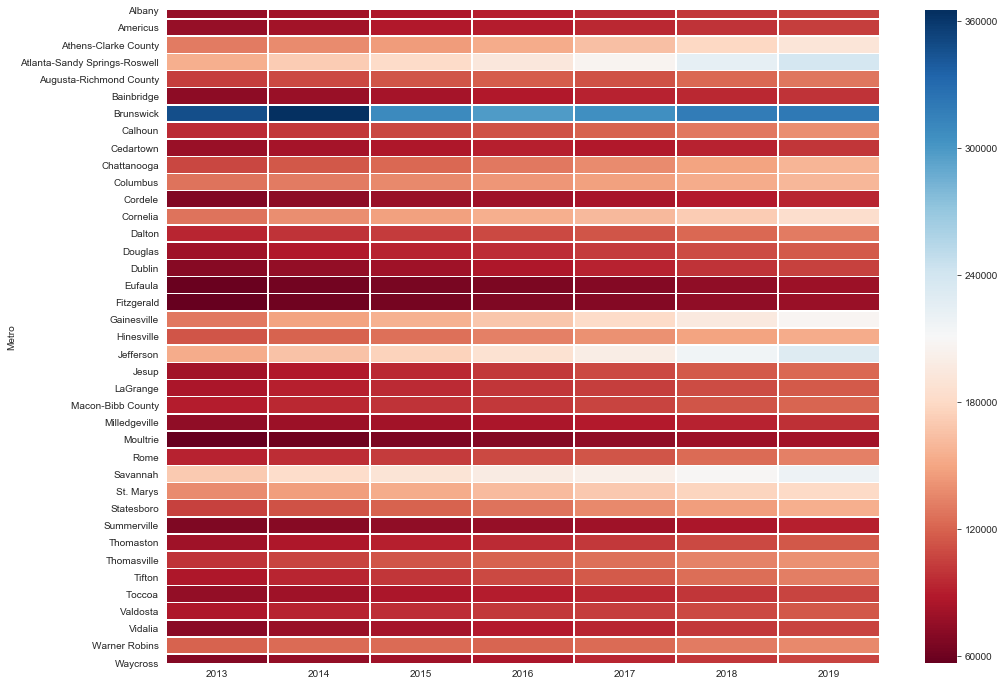

In [65]:
x = df.resample('Y').mean()
x.index = x.index.year
plt.figure(figsize=(16,12))
sns.heatmap(x.T, annot=False,linewidth = 0.5, cmap='RdBu')

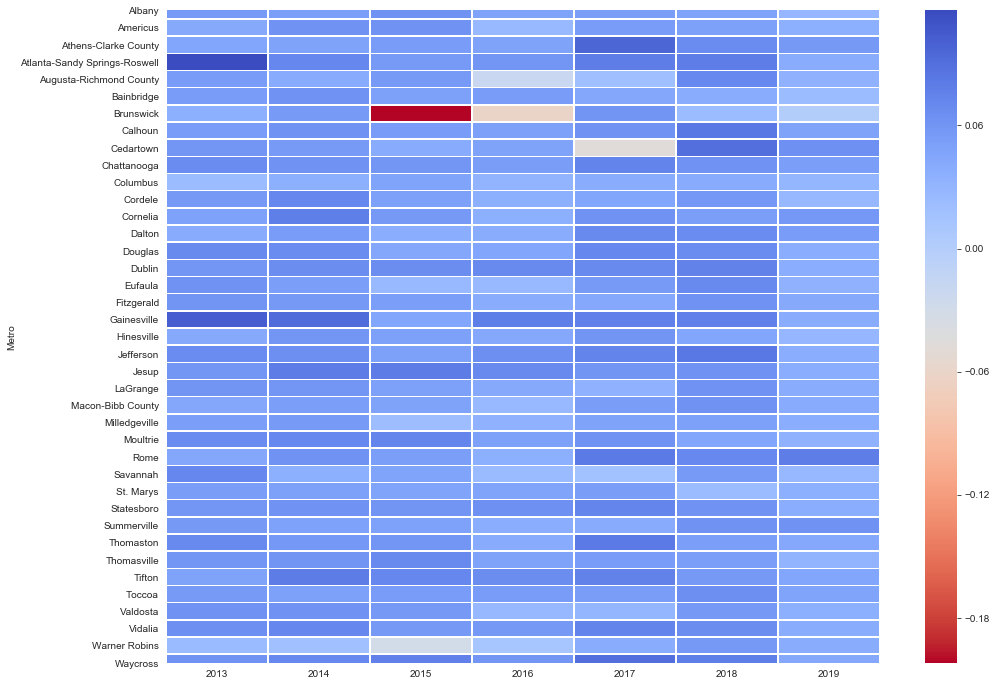

In [66]:
x = ((df - df.shift(1))/df)
x = x.resample('Y').sum()
x.index = x.index.year
plt.figure(figsize=(16,12))
sns.heatmap(x.T, annot=False,linewidth = 0.5, cmap='coolwarm_r')

Text(0.5, 1.0, 'Percent Growth Rate by State (since ) 2013')

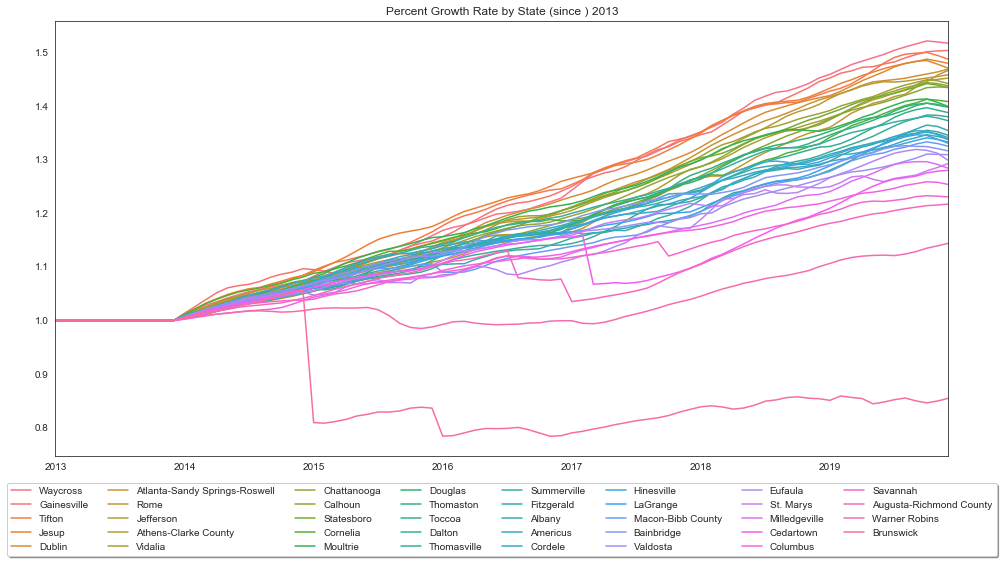

In [67]:
start_year = '2013'

df_pct = ((df - df.shift(1))/df)+1
df_pct.loc[start_year,:] = 1
df_pct = df_pct.loc[start_year:].fillna(method='ffill')
df_pct.cumprod().sort_values(by=df_pct.index[-1],axis=1,ascending=False).plot(figsize=(16,8))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=8, fancybox=True, shadow=True)
plt.title('Percent Growth Rate by State (since ) ' + str(df_pct.index[1].year))
# df_pct

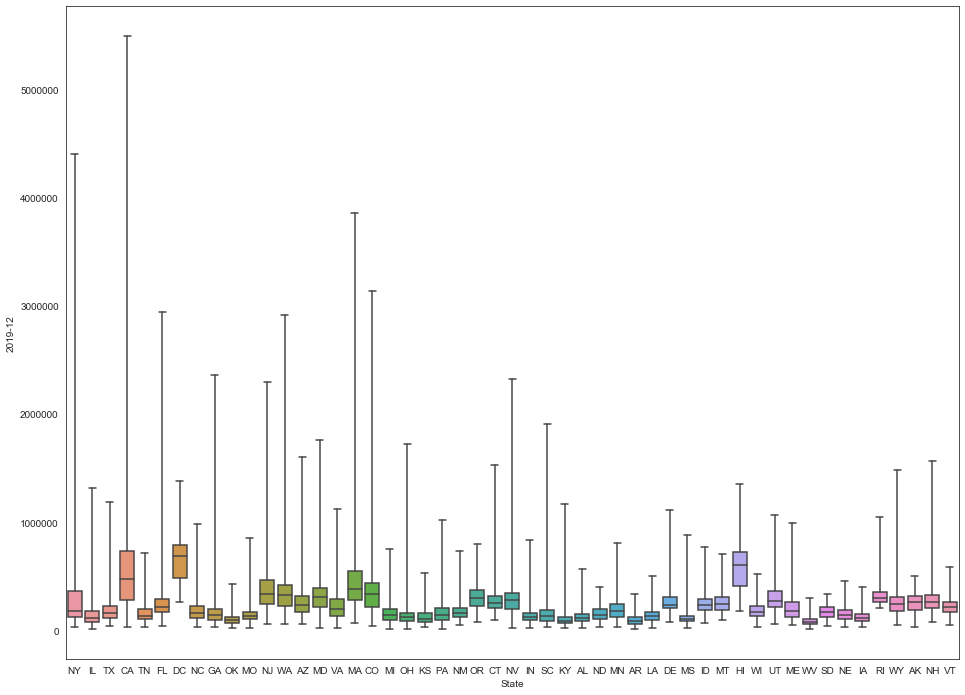

In [68]:
plt.figure(figsize=(16,12))
sns.boxplot(x=zip_data['State'], y=zip_data['2019-12'], data=zip_data,
            whis="range")

In [70]:
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E","B23025_004E","B01002_001E",
                          "B19301_001E","B15003_022E","B08136_003E","B08136_007E",
                          "B17001_002E","B23025_005E","B23025_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "B15003_022E": "Bachelors Degree",
                                      "B08136_003E": "Commute Time by Auto in Min",
                                      "B08136_007E": "Commute Time by Public Transp in Min",
                                      "B23025_002E": "Employable People in the Labor Force",
                                      "NAME":"Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)



# Final DataFrame
census2017 = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income","Poverty Count", "Poverty Rate","Unemployment Rate",
                       "Bachelors Degree","Commute Time by Auto in Min","Commute Time by Public Transp in Min","Employable People in the Labor Force"]]

APIKeyError: ' <html>     <head>         <title>Invalid Key</title>     </head>     <body>         <p>             A valid <em>key</em> must be included with each data API request.             You included a key with this request, however, it is not valid.             Please check your key and try again.         </p>         <p>             If you do not have a key you my sign up for one <a href="key_signup.html">here</a>.         </p>     </body> </html>'

In [71]:
census2017 = census2017.apply(pd.to_numeric)
census2017.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Count', 'Poverty Rate',
       'Unemployment Rate', 'Bachelors Degree', 'Commute Time by Auto in Min',
       'Commute Time by Public Transp in Min',
       'Employable People in the Labor Force'],
      dtype='object')

In [72]:
df = zip_data.reset_index(drop=True)
df = pd.merge(df,census2017,left_on='RegionName',right_on='Zipcode')
df = df[df['State'] == "GA"]

In [73]:
# years = ['2015','2016','2017','2018','2019']
# months = [i+1 for i in range(0,12)]
 
# code = []

# for year in years:
#     for month in months:
#         if month < 10:
#             code.append(year + '-0' + str(month))
#         else:
#             code.append(year + '-' + str(month))

# df_clean = df[['RegionName','Population', 'Median Age', 'Household Income',
#        'Per Capita Income', 'Poverty Count', 'Poverty Rate',
#        'Unemployment Rate', 'Bachelors Degree', 'Commute Time by Auto in Min',
#        'Commute Time by Public Transp in Min','Employable People in the Labor Force']]

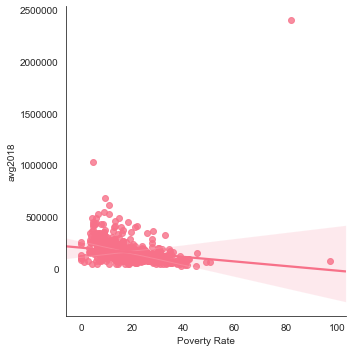

In [94]:
df['avg2018'] = df[['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-07','2018-08','2018-09','2018-09','2018-10','2018-11','2018-12']].mean(axis=1)
sns.lmplot(x = 'Poverty Rate', y ='avg2018', data = df)

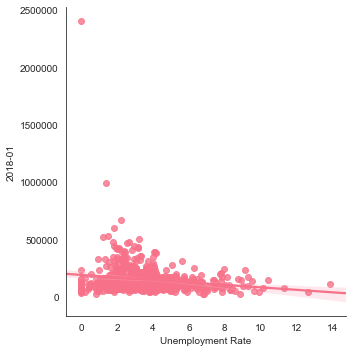

In [78]:
sns.lmplot(x = 'Unemployment Rate', y ='2018-01', data = df)

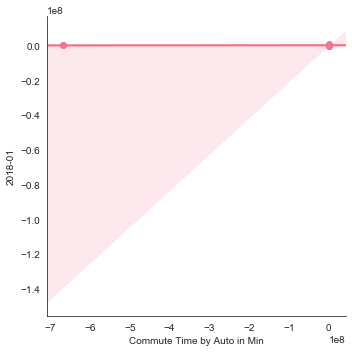

In [75]:
sns.lmplot(x = 'Commute Time by Auto in Min', y ='2018-01', data = df)

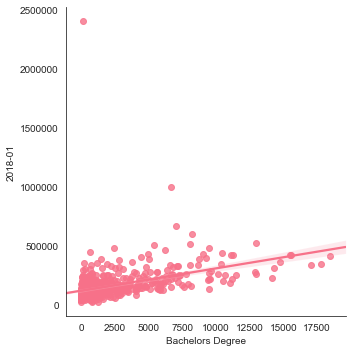

In [59]:
sns.lmplot(x = 'Bachelors Degree', y ='2018-01', data = df)

C:\Users\balho\Anaconda3\envs\PythonData\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\balho\Anaconda3\envs\PythonData\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


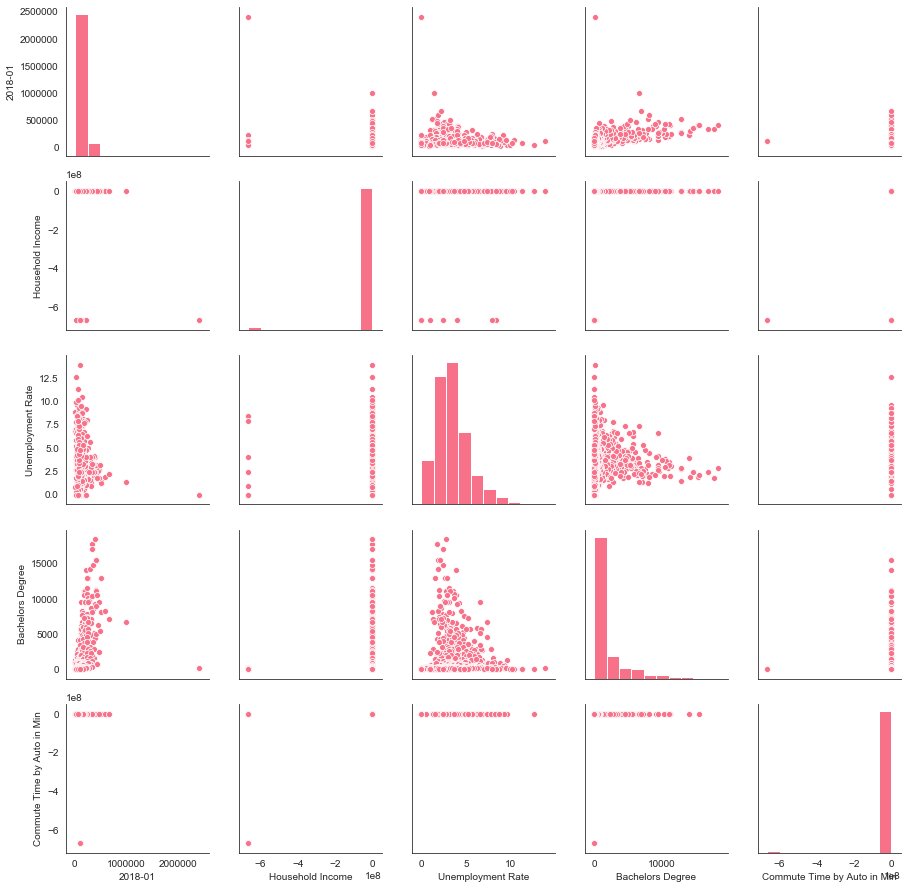

In [60]:
df_clean = df[['2018-01','Household Income','Unemployment Rate',
               'Bachelors Degree','Commute Time by Auto in Min']]

sns.pairplot(df_clean, kind="scatter")
plt.show()